# Mathematical Modeling

In [1]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from lmfit import Model

In [2]:
# Reading the dataframe
df_g_Ecoli = pd.read_excel("Dados de crescimento.xlsx")

In [3]:
df_g_Ecoli

,v (u.C/h),S (mg/l)
0,0.06,6.0
1,0.12,13.0
2,0.24,33.0
3,0.31,40.0
4,0.43,64.0
5,0.53,102.0
6,0.60,122.0
7,0.66,153.0
8,0.69,170.0
9,0.71,221.0


## Fitting

In [4]:
# Setting the model
def v(S, u_max, Km):
    return u_max*S/(Km + S)

In [5]:
modelo_Ecoli = Model(v)

# Setting the initial parameters
params = modelo_Ecoli.make_params(u_max=0.8, Km = 60)

print(f'Variável independente: {modelo_Ecoli.independent_vars}')
print(f'Parâmetros do modelo: {modelo_Ecoli.param_names}')

Variável independente: ['S']
Parâmetros do modelo: ['u_max', 'Km']


In [6]:
# Fitting the model
resultado_fit = modelo_Ecoli.fit(df_g_Ecoli["v (u.C/h)"], params, S=df_g_Ecoli["S (mg/l)"])
print(resultado_fit.fit_report())

[[Model]]
    Model(v)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 11
    # variables        = 2
    chi-square         = 0.00224525
    reduced chi-square = 2.4947e-04
    Akaike info crit   = -89.4651869
    Bayesian info crit = -88.6693964
[[Variables]]
    u_max:  1.07398126 +/- 0.03613514 (3.36%) (init = 0.8)
    Km:     100.548900 +/- 7.83863271 (7.80%) (init = 60)
[[Correlations]] (unreported correlations are < 0.100)
    C(u_max, Km) =  0.962


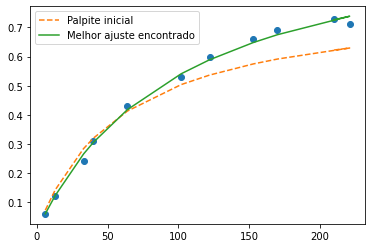

In [7]:
# plotting the fitting
plt.plot(df_g_Ecoli["S (mg/l)"], df_g_Ecoli["v (u.C/h)"], 'o')
plt.plot(df_g_Ecoli["S (mg/l)"], resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(df_g_Ecoli["S (mg/l)"], resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.legend()
#plt.ylim(0, 1000)
#plt.yscale('log')
plt.show()

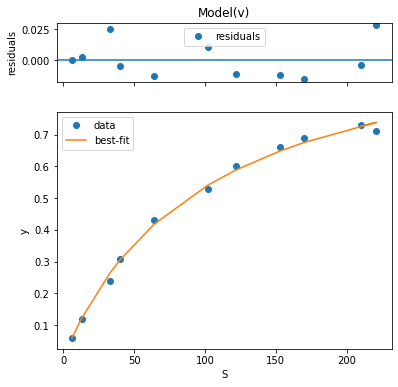

In [8]:
resultado_fit.plot()
#plt.savefig('aanc_lmfit.png', dpi=100, format='png', facecolor='white')
plt.show()

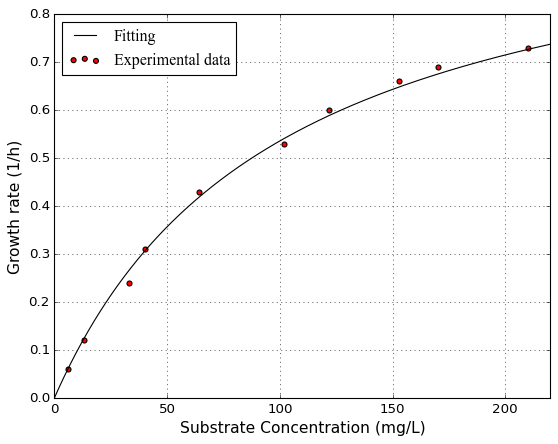

In [9]:
# Plotting the final fit

u_max = 1.07398126
Km = 100.548900

def v(S):
    return u_max*S/(Km + S)

S = np.linspace(0, 220, 500)

plt.style.use('classic')

# Create a Matplotlib figure with a transparent background
fig, ax = plt.subplots()
fig.patch.set_facecolor('none')  # Set the background color to transparent

# Set the font family to Times New Roman for various text elements
plt.rcParams['font.family'] = 'Times New Roman'
ax.set_xlabel('Substrate Concentration (mg/L)', fontsize=14)
ax.set_ylabel('Growth rate (1/h)', fontsize=14)

# Plot your data
ax.scatter(df_g_Ecoli["S (mg/l)"], df_g_Ecoli["v (u.C/h)"], label='Experimental data', c='r')

# Plot your data
ax.plot(S, v(S), label='Fitting', c='black')

# Add limits
ax.set_xlim(0, 220)
ax.set_ylim(0, 0.8)

# Add legend
ax.legend(loc='upper left')

ax.grid()

plt.savefig('Growth fitting.png', dpi=600)

# Show the plot
plt.show()

## Bioreactor Equation

$
\frac{dS}{dt} = \frac{Q}{V}(S_a - S) - \frac{X}{Y_{X/S}} \mu_{máx} \left( \frac{S}{K_S + S} \right)
$

$
\frac{dX}{dt} = - \frac{Q}{V} X + X \mu_{máx} \left( \frac{S}{K_S + S} \right)
$

In [10]:
# constants definition
Q = 0.2
V = 1
S_a = 250
Y_xs = 0.08
u_max = u_max
K_s = Km

def f(x_0):
    X = x[0][0]
    S = x[1][0]

    a1 = -(Q/V)*X + X*u_max*(S/(K_s + S))
    a2 = (Q/V)*(S_a - S) - (X/Y_xs)*u_max*(S/(K_s + S))
    
    return np.array([[a1], [a2]])

# euler method
def euler_method(x_0, h):
    return x_0 + h*f(x_0)

In [11]:
# definition of the constant h
h = 0.001
X_0 = 10
S_0 = 250
x_0 = np.array([[X_0], [S_0]])
t_final = 50

# cálculo da solução analítica
time = list(np.arange(0, t_final, h))
cells = [x_0[0][0]]
substrate = [x_0[1][0]]

x = x_0
for t in time[1:]:
    x = euler_method(x, h)
    cells.append(x[0][0])
    substrate.append(x[1][0])

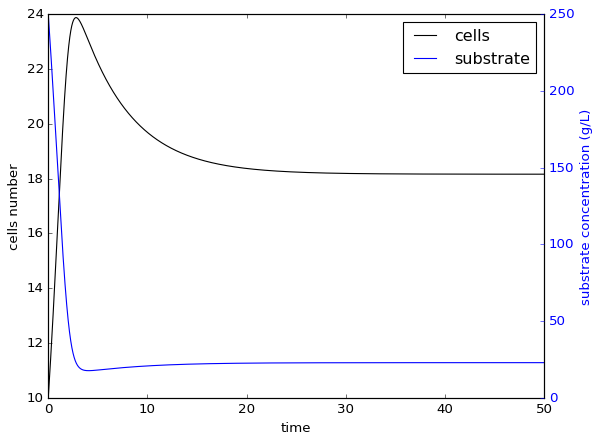

In [12]:
plt.style.use('classic')

# Create the first set of axes on the left side
fig, ax1 = plt.subplots()
fig.patch.set_facecolor('none')  # Set the background color to transparent
ax1.plot(time, cells, 'black', label = 'cells')
ax1.set_xlabel('time (h)')
ax1.set_ylabel('cells number', color='black')
ax1.tick_params('y', colors='black')

# Create the second set of axes on the right side
ax2 = ax1.twinx()
ax2.plot(time, substrate, 'blue', label = 'substrate')
ax2.set_ylabel('substrate concentration (g/L)', color='blue')
ax2.tick_params('y', colors='blue')

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.savefig('Bioreactor evolution.png', dpi=600)

plt.show()